In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import json
import os
import numpy as np

2022-12-21-06.json
2023-01-05-01.json


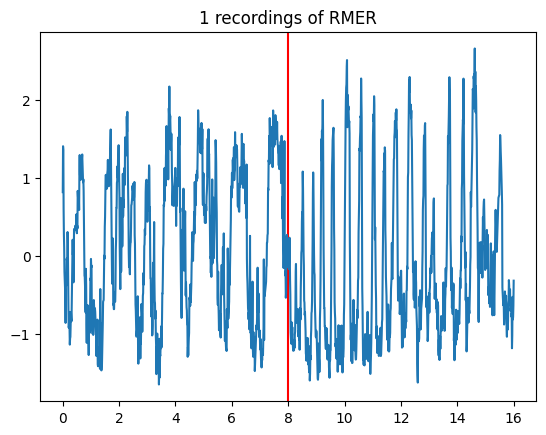

In [28]:
labeled_neurons_heat_og = {}
labeled_neurons_heat_1600 = {}
timestamps = {}

# Baseline

# Heat

heat_neurons_recorded = set()

for json_file in os.listdir("datasets/heat"):
    print(json_file)

    with open("datasets/heat/" + json_file) as f:
        d = json.load(f)

    date = json_file.replace(".json", "") #filename is date
    labeled_neurons_heat_og[date] = {}
    labeled_neurons_heat_1600[date] = {}
    
    timestamps_relative = d["timestamp_confocal"].copy()
    for i in range(0, len(timestamps_relative)):
        timestamps_relative[i] -= d["timestamp_confocal"][0] # relative timestamps between 0 and 16 minutes
        timestamps_relative[i] /= 60 # turn seconds into minutes
    timestamps[date] = timestamps_relative


    for label in d["labeled"]:
        neuron_number = label # index start from 1
        neuron_index = int(neuron_number) - 1
        neuron_label = d["labeled"][str(neuron_number)]["label"] # name of neuron
        neuron_data = d["trace_array"][neuron_index] # z-scored activity data
        labeled_neurons_heat_og[date][neuron_label] = neuron_data

        # turn neuron data into 1600 datapoints (100 per minute) for easy average of all datasets per neuron
        neuron_data_1600 = [None] * 1600
        og_data_index = 0
        current_1600_timestep = 0.0
        for i in range(0,1600):
            while (og_data_index < len(timestamps[date])) & (abs(timestamps[date][og_data_index] - current_1600_timestep) < abs(timestamps[date][og_data_index-1] - current_1600_timestep)):
                # this means we've found a timestamp within the og data matching the current 1/1600 timestep more closely
                og_data_index += 1
            neuron_data_1600[i] = neuron_data[og_data_index]
            current_1600_timestep += 0.01
        labeled_neurons_heat_1600[date][neuron_label] = neuron_data_1600

        # only consider neurons we're certain about
        if '?' not in neuron_label:
            heat_neurons_recorded.add(neuron_label)

        
neuron_name = "ADLL"
# x_axis1 = timestamps["2022-12-21-06"]
# y_axis1 = labeled_neurons_heat_og["2022-12-21-06"][neuron_name]
# plt.plot(x_axis1, y_axis1)
# plt.plot(x_axis2, y_axis2)
# plt.title(date+ " "+neuron_name)
# plt.show()


        
# Average for heat
# Make sure to show how many datasets have this neuron
            
average_heat = {}
        
for neuron_name in heat_neurons_recorded:
    all_datasets = []
    datasets_count = 0

    for dataset in labeled_neurons_heat_1600.keys():
        if neuron_name in labeled_neurons_heat_1600[dataset]:
            datasets_count += 1
            all_datasets.append(labeled_neurons_heat_1600[dataset][neuron_name])

    datasets_average = np.mean(all_datasets, axis=0)
    average_heat.update({neuron_name:[datasets_average,datasets_count]})
    

timestamps_1600 = np.linspace(0, 16, num=1600)

x_axis2 = timestamps_1600
y_axis2 = average_heat[neuron_name][0]
plt.axvline(x = 8, color = 'r')
plt.title(str(average_heat[neuron_name][1]) + " recordings of " + neuron_name)
plt.plot(x_axis2, y_axis2)

# first print out average of every neuron, with average of both heat and baseline on one graph
# then have it commented out to print out all measurements within each neuron, with the averages for heat and baseline on top
# also when printing out all measurements, have them color coded by heat vs baseline

- try not z-scored data, try the original